In [12]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

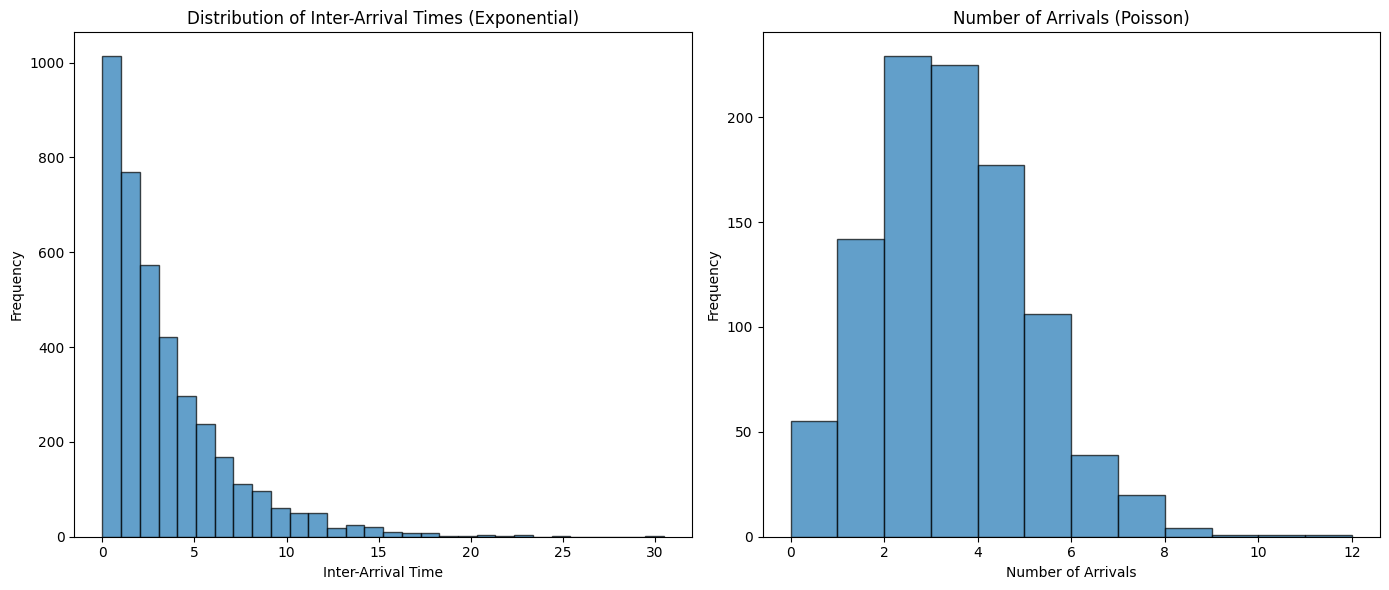

In [15]:


# Parameters
λ = 0.3  # Average arrival rate (customers per unit time)
simulation_time = 10  # Total time to run the simulation
num_simulations = 1000  # Number of trials to observe Poisson arrivals

# Data storage
inter_arrival_times = []
arrival_counts = []

# Simulate multiple trials
for _ in range(num_simulations):
    current_time = 0
    arrivals = 0
    
    while current_time < simulation_time:
        # Generate inter-arrival time (exponentially distributed)
        inter_arrival_time = np.random.exponential(1 / λ)
        inter_arrival_times.append(inter_arrival_time)
        
        current_time += inter_arrival_time
        
        if current_time <= simulation_time:
            arrivals += 1
    
    # Record the number of arrivals for Poisson distribution
    arrival_counts.append(arrivals)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for Exponential distribution (inter-arrival times)
axes[0].hist(inter_arrival_times, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Inter-Arrival Times (Exponential)')
axes[0].set_xlabel('Inter-Arrival Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for Poisson distribution (number of arrivals)
axes[1].hist(arrival_counts, bins=range(min(arrival_counts), max(arrival_counts) + 1), edgecolor='black', alpha=0.7)
axes[1].set_title(f'Number of Arrivals (Poisson)')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()

plt.savefig('../content/vis/exponential_interarrival_times_poisson_number_arrivals.png', dpi=300)

plt.show()


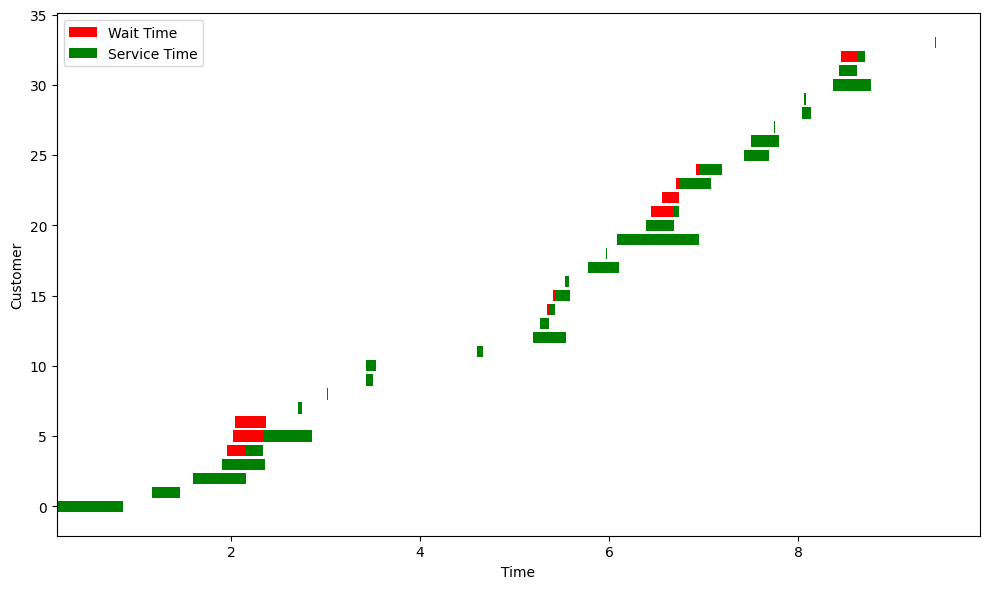

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
lmbda = 3  # arrival rate
mu = 5     # service rate
c = 2      # number of servers
simulation_time = 10  # simulate for 10 time units

# Time intervals for arrivals (exponentially distributed)
np.random.seed(42)  # For reproducibility
arrival_times = np.cumsum(np.random.exponential(1/lmbda, 50))
arrival_times = arrival_times[arrival_times <= simulation_time]  # limit arrivals to simulation time

# Service times (exponentially distributed)
service_times = np.random.exponential(1/mu, len(arrival_times))

# Initialize lists for tracking
start_service_times = np.zeros_like(arrival_times)
end_service_times = np.zeros_like(arrival_times)
wait_times = np.zeros_like(arrival_times)

# Queue system simulation
servers = [0] * c  # server end times
for i, arrival in enumerate(arrival_times):
    next_available_server = min(servers)  # when the next server becomes available
    if arrival >= next_available_server:  # customer arrives after the server is free
        start_service_times[i] = arrival
    else:  # customer waits for the server
        start_service_times[i] = next_available_server
    
    end_service_times[i] = start_service_times[i] + service_times[i]
    wait_times[i] = start_service_times[i] - arrival
    servers[servers.index(next_available_server)] = end_service_times[i]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(arrival_times)):
    # Arrival time bar
    ax.barh(i, start_service_times[i] - arrival_times[i], left=arrival_times[i], color='red', label='Wait Time' if i == 0 else "")
    # Service time bar
    ax.barh(i, service_times[i], left=start_service_times[i], color='green', label='Service Time' if i == 0 else "")

ax.set_xlabel('Time')
ax.set_ylabel('Customer')
# ax.set_title(f'M/M/{c} Queue System Simulation')
ax.legend()
plt.tight_layout()

plt.savefig('../content/vis/queuing.png', dpi=300)

plt.show()


In [46]:
# Performance metrics calculations

# 1. Average wait time in queue (Wq)
average_wait_time = np.mean(wait_times)

# 2. Average service time (W)
average_service_time = np.mean(service_times)

# 3. Utilization (ρ) for each server
utilization = np.sum(service_times) / (c * simulation_time)

# 4. Average number of customers in the queue (Lq)
# Lq = lambda * Wq
avg_customers_in_queue = lmbda * average_wait_time

# 5. Average number of customers in the system (L)
# L = lambda * (Wq + 1/mu)
avg_customers_in_system = lmbda * (average_wait_time + 1/mu)

# Output the performance metrics
d = {
    "Average Wait Time (Wq)": average_wait_time,
    "Average Service Time (W)": average_service_time,
    "Utilization (ρ)": utilization,
    "Average Number of Customers in Queue (Lq)": avg_customers_in_queue,
    "Average Number of Customers in System (L)": avg_customers_in_system
}

pl.DataFrame({
    'Metric': d.keys(),
    'Value': d.values(),
}).with_columns(pl.col('Value').round(4))

Metric,Value
str,f64
"""Average Wait Time (Wq)""",0.0456
"""Average Service Time (W)""",0.212
"""Utilization (ρ)""",0.3604
"""Average Number of Customers in…",0.1369
"""Average Number of Customers in…",0.7369


In [48]:
# Parameters for cost calculation
cost_per_server = 100
cost_per_wait_time = 50

# Function to simulate performance metrics and calculate total cost
def simulate_mmc_queue(lmbda, mu, c, simulation_time):
    # Time intervals for arrivals (exponentially distributed)
    arrival_times = np.cumsum(np.random.exponential(1/lmbda, 50))
    arrival_times = arrival_times[arrival_times <= simulation_time]

    # Service times (exponentially distributed)
    service_times = np.random.exponential(1/mu, len(arrival_times))

    # Initialize lists for tracking
    start_service_times = np.zeros_like(arrival_times)
    end_service_times = np.zeros_like(arrival_times)
    wait_times = np.zeros_like(arrival_times)

    # Queue system simulation
    servers = [0] * c  # server end times
    for i, arrival in enumerate(arrival_times):
        next_available_server = min(servers)  # when the next server becomes available
        if arrival >= next_available_server:  # customer arrives after the server is free
            start_service_times[i] = arrival
        else:  # customer waits for the server
            start_service_times[i] = next_available_server

        end_service_times[i] = start_service_times[i] + service_times[i]
        wait_times[i] = start_service_times[i] - arrival
        servers[servers.index(next_available_server)] = end_service_times[i]

    # Metrics calculation
    average_wait_time = np.mean(wait_times)
    average_service_time = np.mean(service_times)
    utilization = np.sum(service_times) / (c * simulation_time)
    avg_customers_in_queue = lmbda * average_wait_time
    avg_customers_in_system = lmbda * (average_wait_time + 1/mu)
    
    # Total cost calculation
    total_cost = (cost_per_server * c) + (cost_per_wait_time * average_wait_time * len(arrival_times))
    
    return {
        "c": c,
        "Average Wait Time (Wq)": average_wait_time,
        "Utilization (ρ)": utilization,
        "Average Number of Customers in Queue (Lq)": avg_customers_in_queue,
        "Total Cost": total_cost
    }

# Simulate for different number of servers
results = []
for c in range(1, 6):  # Test server counts from 1 to 5
    result = simulate_mmc_queue(lmbda, mu, c, simulation_time)
    results.append(result)

df = pl.from_dicts(results).with_columns(pl.col(
    'Average Wait Time (Wq)',
    'Utilization (ρ)', 
    'Average Number of Customers in Queue (Lq)', 
    'Total Cost'
).round(4))

df


c,Average Wait Time (Wq),Utilization (ρ),Average Number of Customers in Queue (Lq),Total Cost
i64,f64,f64,f64,f64
1,0.0463,0.3639,0.1389,150.9151
2,0.004,0.2431,0.0121,206.6381
3,0.0153,0.2252,0.0458,325.2168
4,0.0,0.1714,0.0,400.0
5,0.0,0.0862,0.0,500.0
